In [159]:
import pandas as pd
import myplot as mp

pd.set_option("display.max_rows", 10)

# Dataset

In [160]:
# Membaca file excel
df = pd.read_excel('dataset.xlsx')
# Mengurutkan File berdasarkan tahun
df = df.sort_values(by='Tahun', ascending=True).reset_index(drop=True)
df 

,Tipe,Tahun,Luas Bgn,Luas Tanah,Jml Kmr Tidur,Jml Kmr Mandi,Garasi,Harga,Lokasi
0,21.0,2018,21,50,1,1,1,127600000,NaN
1,90.0,2018,90,112,3,1,1,610000000,NaN
2,80.0,2018,80,120,3,2,1,601000000,NaN
3,68.0,2018,68,85,3,2,1,554000000,NaN
4,36.0,2018,36,60,2,1,1,174000000,NaN
...,...,...,...,...,...,...,...,...,...
55,NaN,2023,45,70,2,1,1,250000000,NaN
56,NaN,2023,36,60,2,1,1,210000000,NaN
57,NaN,2023,21,50,1,1,1,155000000,NaN
58,NaN,2023,80,120,3,2,1,674000000,NaN


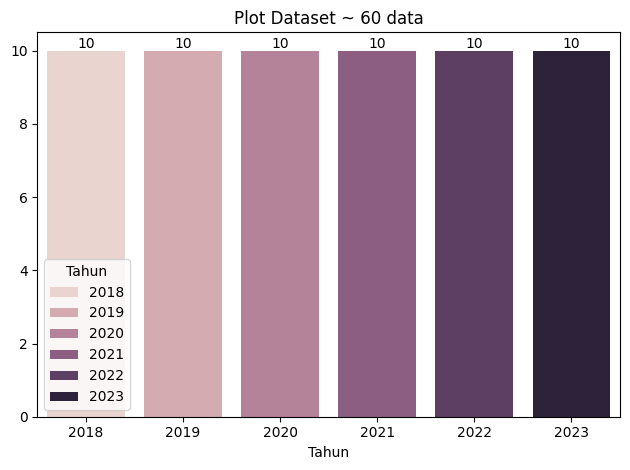

In [166]:
# Count data tahun
count_df = df['Tahun'].value_counts()
# Plot
mp.bar_plot(x=count_df.index, y=count_df.values, hue=count_df.index, title=f"Plot Dataset ~ {count_df.values.sum()} data")